# Feature Engineering Assignment 1
The data files Bollywood.csv and Bollywood - 2 .csv contains the box office collection and social
media promotion information about the movies released in 2013 – 2015 period.
Following is the information about the columns (names can vary):

Serial Id of movie
 Release date of movie
 Release time of movie like Long Weekend (3), Festive Season (1), Holiday Season (2),
and Normal (4)
 Genre of movie like Romance, Thriller, Action, comedy etc.
 Budget of movie in crores
 Box office collection of movie in crore
 YouTube views of movies trailers
 YouTube likes for the movie trailers
 YouTube dislikes for the movie trailers
Q1. Identify and rectify the eight prominent data quality issues present in the given
datasets.
[8]
Q2. How many records are present in the combined dataset? Print the metadata
information of dataset.
[1]
Q3. How many movies in each genre got released in different release times?
Q4. Which month of the year, maximum movie releases are seen?
[1]
[1]
Q5. Which movies have got more dislikes than likes on Youtube? What are the number of
views on these movies?
[1]
Q6. Which month of the year typically sees most releases of high budgeted movies, that
is, movies with budget of 25 crore or more?
[1]
Q7. What is the correlation between Box office collection & Budget? How would you
interpret it?
[1]
Q8. Which are the top 10 movies with maximum return of investment (ROI)? Calculate ROI
as (Box office collection – Budget) / Budget.
[1]

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
b1 = pd.read_csv("bollywood.csv")

In [3]:
b1.head()

,No,RelDate,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes,YoutubeLikeDislikes
0,1,Apr-18-2014,2 States,3,RomanceGenre,36Cr,104,8576361,26622.0,2527.0,29149
1,2,Jan-4-2013,Table No. 21,4,Thriller,Cr10,12,1087320,1129.0,137.0,1266
2,3,Jul-18-2014,Amit Sahni Ki List,4,ComedyGenre,10Cr,4,572336,586.0,54.0,640
3,4,Jan-4-2013,Rajdhani Express,4,DramaGenre,7Cr,383,42626,86.0,19.0,105
4,5,Jul-4-2014,Bobby Jasoos,44,ComedyGenre,18Cr,10.8,3113427,4512.0,1224.0,5736


In [4]:
b2 = pd.read_csv("bollywood - 2.csv")

In [5]:
b2.head()

,Movie_ID,Release_Date,Movie_Name,Release_Time,Genre,BudgetCr,BoxOfficeCollectionCr,Youtube_Views,Youtube_Likes,Youtube_Dislikes
0,51,4-Jul-14,Lekar Hum Deewana Dil,N,Romance,16,2.50,3998331,2307,497
1,52,22-Mar-13,Aatma,N,Thriller,8,8.78,841891,997,306
2,53,4-Apr-14,Main Tera Hero,LW,Comedy,40,55.00,4903941,12657,2139
3,54,22-Mar-13,Sona Spa,N,Thriller,10,0.24,79430,61,112
4,55,29-Mar-13,Himmatwala,N,Action,50,100.00,2501277,1,1


# Q1. Identify and rectify the eight prominent data quality issues present in the given datasets.

1) Column Names are different hence make them similar
2) Check for null values and missing column if any and correct it
3) Check data type of columns and align them
4) Correcting data of 'RelDate' column and converting it into Datetime from Object
5) #Remove 'Cr' from Budget and BoxofficeCollection to use them for calculation
6) #Converting ReleaseTime data for both dataset into similar enumeration
7) #Removing spaces and postixes from Genre column
8) #Remove duplicate records after merging datasets

In [6]:
b1.columns

Index(['No', 'RelDate', 'MovieName', 'ReleaseTime', 'Genre', 'Budget',
       'BoxOfficeCollection', 'YoutubeViews', 'YoutubeLikes',
       'YoutubeDislikes', 'YoutubeLikeDislikes'],
      dtype='object')

In [7]:
b2.columns

Index(['Movie_ID', 'Release_Date', 'Movie_Name', 'Release_Time', 'Genre',
       'BudgetCr', 'BoxOfficeCollectionCr', 'Youtube_Views', 'Youtube_Likes',
       'Youtube_Dislikes'],
      dtype='object')

In [8]:
# Renaming bollywood2 dataset column to match bollywood
b2 = b2.rename({'Movie_ID': 'No', 'Release_Date': 'RelDate','Movie_Name' : 'MovieName','Release_Time':'ReleaseTime','BudgetCr':'Budget','BoxOfficeCollectionCr':'BoxOfficeCollection','Youtube_Views':'YoutubeViews','Youtube_Likes':'YoutubeLikes','Youtube_Dislikes':'YoutubeDislikes'}, axis=1)

In [9]:
b2.columns

Index(['No', 'RelDate', 'MovieName', 'ReleaseTime', 'Genre', 'Budget',
       'BoxOfficeCollection', 'YoutubeViews', 'YoutubeLikes',
       'YoutubeDislikes'],
      dtype='object')

In [10]:
# Adding 'YoutubeLikeDislikes' column in bollywood2 dataset
b2['YoutubeLikeDislikes'] = b2['YoutubeDislikes']+ b2['YoutubeLikes']

In [11]:
b2.columns

Index(['No', 'RelDate', 'MovieName', 'ReleaseTime', 'Genre', 'Budget',
       'BoxOfficeCollection', 'YoutubeViews', 'YoutubeLikes',
       'YoutubeDislikes', 'YoutubeLikeDislikes'],
      dtype='object')

In [12]:
#Check for null values
b1.isnull().sum()

No                     0
RelDate                0
MovieName              0
ReleaseTime            0
Genre                  0
Budget                 0
BoxOfficeCollection    0
YoutubeViews           0
YoutubeLikes           1
YoutubeDislikes        3
YoutubeLikeDislikes    0
dtype: int64

In [13]:
b2.isnull().sum()

No                     0
RelDate                0
MovieName              0
ReleaseTime            0
Genre                  0
Budget                 0
BoxOfficeCollection    0
YoutubeViews           0
YoutubeLikes           0
YoutubeDislikes        0
YoutubeLikeDislikes    0
dtype: int64

In [14]:
#Bollywood dataset contains null values hence we will fill them
#As youtubeLikes + YoutubeDislikes = YoutubeLikeDislikes hence we will use this logic to fill missing values
b1['YoutubeLikes'] = b1['YoutubeLikes'].fillna(b1['YoutubeLikeDislikes']- b1['YoutubeDislikes'])
b1['YoutubeDislikes'] = b1['YoutubeDislikes'].fillna(b1['YoutubeLikeDislikes']- b1['YoutubeLikes'])

In [15]:
# Check the result ater removing all null values
b1.isnull().sum()

No                     0
RelDate                0
MovieName              0
ReleaseTime            0
Genre                  0
Budget                 0
BoxOfficeCollection    0
YoutubeViews           0
YoutubeLikes           0
YoutubeDislikes        0
YoutubeLikeDislikes    0
dtype: int64

In [16]:
#Check data type
b1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   No                   51 non-null     int64  
 1   RelDate              51 non-null     object 
 2   MovieName            51 non-null     object 
 3   ReleaseTime          51 non-null     int64  
 4   Genre                51 non-null     object 
 5   Budget               51 non-null     object 
 6   BoxOfficeCollection  51 non-null     object 
 7   YoutubeViews         51 non-null     int64  
 8   YoutubeLikes         51 non-null     float64
 9   YoutubeDislikes      51 non-null     float64
 10  YoutubeLikeDislikes  51 non-null     int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 4.5+ KB


In [17]:
#Correcting data of 'RelDate' column and converting it into Datetime from Object
b1.RelDate = b1.RelDate.replace(to_replace=r'Sqp', value='Sep', regex=True)
b1.RelDate = b1.RelDate.replace(to_replace=r'Jum', value='Jun', regex=True)
b1.RelDate = b1.RelDate.replace(to_replace=r'juu', value='Jun', regex=True)
b1.RelDate = b1.RelDate.replace(to_replace=r'204', value='2014', regex=True)
b1['RelDate'] = pd.to_datetime(b1['RelDate'])

In [18]:
b1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   No                   51 non-null     int64         
 1   RelDate              51 non-null     datetime64[ns]
 2   MovieName            51 non-null     object        
 3   ReleaseTime          51 non-null     int64         
 4   Genre                51 non-null     object        
 5   Budget               51 non-null     object        
 6   BoxOfficeCollection  51 non-null     object        
 7   YoutubeViews         51 non-null     int64         
 8   YoutubeLikes         51 non-null     float64       
 9   YoutubeDislikes      51 non-null     float64       
 10  YoutubeLikeDislikes  51 non-null     int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(4)
memory usage: 4.5+ KB


In [19]:
#Remove 'Cr' from Budget and BoxofficeCollection to use them or calculation
b1['Budget'] = b1['Budget'].replace(to_replace=r'Cr', value='', regex=True)
b1['BoxOfficeCollection'] = b1['BoxOfficeCollection'].replace(to_replace=r'Cr', value='', regex=True)

In [20]:
b1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   No                   51 non-null     int64         
 1   RelDate              51 non-null     datetime64[ns]
 2   MovieName            51 non-null     object        
 3   ReleaseTime          51 non-null     int64         
 4   Genre                51 non-null     object        
 5   Budget               51 non-null     object        
 6   BoxOfficeCollection  51 non-null     object        
 7   YoutubeViews         51 non-null     int64         
 8   YoutubeLikes         51 non-null     float64       
 9   YoutubeDislikes      51 non-null     float64       
 10  YoutubeLikeDislikes  51 non-null     int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(4)
memory usage: 4.5+ KB


In [21]:
b1.head(18)

,No,RelDate,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes,YoutubeLikeDislikes
0,1,2014-04-18,2 States,3,RomanceGenre,36,104,8576361,26622.0,2527.0,29149
1,2,2013-01-04,Table No. 21,4,Thriller,10,12,1087320,1129.0,137.0,1266
2,3,2014-07-18,Amit Sahni Ki List,4,ComedyGenre,10,4,572336,586.0,54.0,640
3,4,2013-01-04,Rajdhani Express,4,DramaGenre,7,383,42626,86.0,19.0,105
4,5,2014-07-04,Bobby Jasoos,44,ComedyGenre,18,10.8,3113427,4512.0,1224.0,5736
5,6,2014-05-30,Citylights,2,DramaGenre,7,35,1076591,1806.0,84.0,1890
6,7,2014-09-19,Daawat-E-Ishq,4,ComedyGenre,30,24.6,3905050,8315.0,1373.0,9688
7,8,2013-01-11,Matru Ki Bijlee Ka Mandola,4,ComedyGenre,33,40,2435283,4326.0,647.0,4973
8,9,2014-01-10,Dedh Ishqiya,3,ComedyGenre,31,27,2333067,2436.0,591.0,3027
9,10,2013-01-11,Gangoobai,4,DramaGenre,2,0.01,4354,1.0,1.0,2


In [22]:
# Converting data type of 'Budget' and 'BoxOfficeCollection' to String with by default set the length to the max len it encounters
b1['Budget'] = pd.to_numeric(b1['Budget'],errors = 'coerce',downcast='float')
b1['BoxOfficeCollection'] = pd.to_numeric(b1['BoxOfficeCollection'],errors = 'coerce')

In [23]:
b1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   No                   51 non-null     int64         
 1   RelDate              51 non-null     datetime64[ns]
 2   MovieName            51 non-null     object        
 3   ReleaseTime          51 non-null     int64         
 4   Genre                51 non-null     object        
 5   Budget               51 non-null     float32       
 6   BoxOfficeCollection  51 non-null     float64       
 7   YoutubeViews         51 non-null     int64         
 8   YoutubeLikes         51 non-null     float64       
 9   YoutubeDislikes      51 non-null     float64       
 10  YoutubeLikeDislikes  51 non-null     int64         
dtypes: datetime64[ns](1), float32(1), float64(3), int64(4), object(2)
memory usage: 4.3+ KB


In [24]:
b2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   No                   99 non-null     int64  
 1   RelDate              99 non-null     object 
 2   MovieName            99 non-null     object 
 3   ReleaseTime          99 non-null     object 
 4   Genre                99 non-null     object 
 5   Budget               99 non-null     int64  
 6   BoxOfficeCollection  99 non-null     float64
 7   YoutubeViews         99 non-null     int64  
 8   YoutubeLikes         99 non-null     int64  
 9   YoutubeDislikes      99 non-null     int64  
 10  YoutubeLikeDislikes  99 non-null     int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 8.6+ KB


In [25]:
b2.head()

,No,RelDate,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes,YoutubeLikeDislikes
0,51,4-Jul-14,Lekar Hum Deewana Dil,N,Romance,16,2.50,3998331,2307,497,2804
1,52,22-Mar-13,Aatma,N,Thriller,8,8.78,841891,997,306,1303
2,53,4-Apr-14,Main Tera Hero,LW,Comedy,40,55.00,4903941,12657,2139,14796
3,54,22-Mar-13,Sona Spa,N,Thriller,10,0.24,79430,61,112,173
4,55,29-Mar-13,Himmatwala,N,Action,50,100.00,2501277,1,1,2


In [26]:
b1.ReleaseTime = b1.ReleaseTime.replace(44,4)

In [27]:
#Converting ReleaseTime data for both dataset into similar enumeration
b1.ReleaseTime = b1.ReleaseTime.replace(1,"Festive Season")
b1.ReleaseTime = b1.ReleaseTime.replace(2,"Holiday Season")
b1.ReleaseTime = b1.ReleaseTime.replace(3,"Long Weekend")
b1.ReleaseTime = b1.ReleaseTime.replace(4,"Normal")
b2.ReleaseTime = b2.ReleaseTime.replace('FS',"Festive Season")
b2.ReleaseTime = b2.ReleaseTime.replace('HS',"Holiday Season")
b2.ReleaseTime = b2.ReleaseTime.replace('LW',"Long Weekend")
b2.ReleaseTime = b2.ReleaseTime.replace('N',"Normal")

In [28]:
# Converting data types
b2['RelDate'] = pd.to_datetime(b2['RelDate'])
b2['Budget'] = pd.to_numeric(b2['Budget'],errors = 'coerce',downcast='float')

In [29]:
b2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   No                   99 non-null     int64         
 1   RelDate              99 non-null     datetime64[ns]
 2   MovieName            99 non-null     object        
 3   ReleaseTime          99 non-null     object        
 4   Genre                99 non-null     object        
 5   Budget               99 non-null     float32       
 6   BoxOfficeCollection  99 non-null     float64       
 7   YoutubeViews         99 non-null     int64         
 8   YoutubeLikes         99 non-null     int64         
 9   YoutubeDislikes      99 non-null     int64         
 10  YoutubeLikeDislikes  99 non-null     int64         
dtypes: datetime64[ns](1), float32(1), float64(1), int64(5), object(3)
memory usage: 8.2+ KB


In [30]:
b1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   No                   51 non-null     int64         
 1   RelDate              51 non-null     datetime64[ns]
 2   MovieName            51 non-null     object        
 3   ReleaseTime          51 non-null     object        
 4   Genre                51 non-null     object        
 5   Budget               51 non-null     float32       
 6   BoxOfficeCollection  51 non-null     float64       
 7   YoutubeViews         51 non-null     int64         
 8   YoutubeLikes         51 non-null     float64       
 9   YoutubeDislikes      51 non-null     float64       
 10  YoutubeLikeDislikes  51 non-null     int64         
dtypes: datetime64[ns](1), float32(1), float64(3), int64(3), object(3)
memory usage: 4.3+ KB


In [31]:
b1.groupby(['Genre'])['No'].count()

Genre
 Drama           1
 DramaGenre     11
Action           1
ActionGenre      9
ComedyGenre     12
RomanceGenre     9
Thriller         5
Thriller         3
Name: No, dtype: int64

In [32]:
#Removing spaces and postixes from Genre column
b1.Genre = b1.Genre.str.strip()
b1.Genre = b1.Genre.replace("ActionGenre", "Action")
b1.Genre = b1.Genre.replace("ComedyGenre", "Comedy")
b1.Genre = b1.Genre.replace("RomanceGenre", "Romance")
b1.Genre = b1.Genre.replace("DramaGenre", "Drama")
b2.Genre = b2.Genre.str.strip()

In [33]:
b1.groupby(['Genre'])['No'].count()

Genre
Action      10
Comedy      12
Drama       12
Romance      9
Thriller     8
Name: No, dtype: int64

In [34]:
b2.groupby(['Genre'])['No'].count()

Genre
Action      14
Comedy      24
Drama       23
Romance     17
Thriller    21
Name: No, dtype: int64

In [35]:
#Merging the datasets
b1b2 = b1.append(b2)

In [36]:
b1b2.shape

(150, 11)

In [37]:
b1b2.head(60)

,No,RelDate,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes,YoutubeLikeDislikes
0,1,2014-04-18,2 States,Long Weekend,Romance,36.0,104.00,8576361,26622.0,2527.0,29149
1,2,2013-01-04,Table No. 21,Normal,Thriller,10.0,12.00,1087320,1129.0,137.0,1266
2,3,2014-07-18,Amit Sahni Ki List,Normal,Comedy,10.0,4.00,572336,586.0,54.0,640
3,4,2013-01-04,Rajdhani Express,Normal,Drama,7.0,383.00,42626,86.0,19.0,105
4,5,2014-07-04,Bobby Jasoos,Normal,Comedy,18.0,10.80,3113427,4512.0,1224.0,5736
5,6,2014-05-30,Citylights,Holiday Season,Drama,7.0,35.00,1076591,1806.0,84.0,1890
6,7,2014-09-19,Daawat-E-Ishq,Normal,Comedy,30.0,24.60,3905050,8315.0,1373.0,9688
7,8,2013-01-11,Matru Ki Bijlee Ka Mandola,Normal,Comedy,33.0,40.00,2435283,4326.0,647.0,4973
8,9,2014-01-10,Dedh Ishqiya,Long Weekend,Comedy,31.0,27.00,2333067,2436.0,591.0,3027
9,10,2013-01-11,Gangoobai,Normal,Drama,2.0,0.01,4354,1.0,1.0,2


In [38]:
#Remove duplicate records
duplicate = b1b2[b1b2.duplicated('MovieName')]

In [39]:
duplicate

,No,RelDate,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes,YoutubeLikeDislikes
0,51,2014-07-04,Lekar Hum Deewana Dil,Normal,Romance,16.0,2.5,3998331,2307.0,497.0,2804


In [40]:
b1b2.shape

(150, 11)

In [41]:
b1b2 = b1b2.drop_duplicates(subset=['MovieName'])

In [161]:
b1b2.shape

(149, 14)

In [43]:
b1b2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149 entries, 0 to 98
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   No                   149 non-null    int64         
 1   RelDate              149 non-null    datetime64[ns]
 2   MovieName            149 non-null    object        
 3   ReleaseTime          149 non-null    object        
 4   Genre                149 non-null    object        
 5   Budget               149 non-null    float32       
 6   BoxOfficeCollection  149 non-null    float64       
 7   YoutubeViews         149 non-null    int64         
 8   YoutubeLikes         149 non-null    float64       
 9   YoutubeDislikes      149 non-null    float64       
 10  YoutubeLikeDislikes  149 non-null    int64         
dtypes: datetime64[ns](1), float32(1), float64(3), int64(3), object(3)
memory usage: 13.4+ KB


In [55]:
#Q3. How many movies in each genre got released in different release times?
b1b2.groupby(['ReleaseTime','Genre']).apply(lambda x: x['No'].count())

ReleaseTime     Genre   
Festive Season  Action       3
                Comedy       3
                Drama        4
                Romance      3
                Thriller     4
Holiday Season  Action       3
                Comedy       5
                Drama        6
                Romance      3
                Thriller     1
Long Weekend    Action       3
                Comedy       5
                Drama        1
                Romance      4
                Thriller     2
Normal          Action      15
                Comedy      23
                Drama       24
                Romance     15
                Thriller    22
dtype: int64

In [56]:
#Which month of the year, maximum movie releases are seen? 
b1b2['month'] = pd.DatetimeIndex(b1b2['RelDate']).month
b1b2['year'] = pd.DatetimeIndex(b1b2['RelDate']).year

In [57]:
b1b2.head()

,No,RelDate,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes,YoutubeLikeDislikes,month,year
0,1,2014-04-18,2 States,Long Weekend,Romance,36.0,104.0,8576361,26622.0,2527.0,29149,4,2014
1,2,2013-01-04,Table No. 21,Normal,Thriller,10.0,12.0,1087320,1129.0,137.0,1266,1,2013
2,3,2014-07-18,Amit Sahni Ki List,Normal,Comedy,10.0,4.0,572336,586.0,54.0,640,7,2014
3,4,2013-01-04,Rajdhani Express,Normal,Drama,7.0,383.0,42626,86.0,19.0,105,1,2013
4,5,2014-07-04,Bobby Jasoos,Normal,Comedy,18.0,10.8,3113427,4512.0,1224.0,5736,7,2014


In [67]:
b1b2.groupby(['year','month']).apply(lambda x: x['No'].count())
# Based on below data for 2013 - 7th month, 2014 - 5th month, 2015 - 1st month

year  month
2013  1         8
      2         6
      3         8
      4         5
      5         6
      6         5
      7         9
      8         4
      9         5
      10        6
      11        5
2014  1         7
      2         6
      3         8
      4         6
      5        12
      6         5
      7         7
      8         4
      9         5
      10        3
      11        5
      12        2
2015  1         5
      2         4
      3         3
dtype: int64

In [84]:
# Q5. Which movies have got more dislikes than likes on Youtube? What are the number of views on these movies? 
b1b2[b1b2['YoutubeLikes']<b1b2['YoutubeDislikes']]

,No,RelDate,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes,YoutubeLikeDislikes,month,year
15,16,2013-01-18,Bandook,Normal,Action,4.0,0.09,28391,8.0,14.0,22,1,2013
3,54,2013-03-22,Sona Spa,Normal,Thriller,10.0,0.24,79430,61.0,112.0,173,3,2013
35,86,2014-05-09,Yeh Hai Bakrapur,Holiday Season,Comedy,5.0,2.00,1257416,758.0,923.0,1681,5,2014


In [149]:
# Q6. Which month of the year typically sees most releases of high budgeted movies, that is, movies with budget of 25 crore or more? 
hbdf= b1b2[b1b2['Budget']>25]
hbdf

,No,RelDate,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes,YoutubeLikeDislikes,month,year
0,1,2014-04-18,2 States,Long Weekend,Romance,36.0,104.0,8576361,26622.0,2527.0,29149,4,2014
6,7,2014-09-19,Daawat-E-Ishq,Normal,Comedy,30.0,24.6,3905050,8315.0,1373.0,9688,9,2014
7,8,2013-01-11,Matru Ki Bijlee Ka Mandola,Normal,Comedy,33.0,40.0,2435283,4326.0,647.0,4973,1,2013
8,9,2014-01-10,Dedh Ishqiya,Long Weekend,Comedy,31.0,27.0,2333067,2436.0,591.0,3027,1,2014
10,11,2014-03-28,Dishkiyaoon,Normal,Action,28.0,6.0,2397647,3308.0,465.0,3773,3,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,139,2015-01-23,Baby,Normal,Action,60.0,125.0,7968156,29246.0,2426.0,31672,1,2015
91,142,2015-02-06,Shamitabh,Normal,Drama,40.0,38.0,2105508,5599.0,677.0,6276,2,2015
92,143,2015-02-13,Roy,Festive Season,Romance,40.0,58.0,7687797,18974.0,3229.0,22203,2,2015
96,147,2015-03-20,Dilliwali Zaalim Girlfriend,Normal,Comedy,32.0,12.0,2316047,4289.0,807.0,5096,3,2015


In [141]:
hbdf2013 = hbdf[hbdf['year'] == 2013]
hbdf2013['month'].value_counts()

7     5
8     4
2     3
9     3
11    3
1     2
3     2
5     2
6     2
10    2
Name: month, dtype: int64

In [145]:
hbdf2014 = hbdf[hbdf['year'] == 2014]
hbdf2014['month'].value_counts()

2     4
4     4
3     3
6     3
8     3
11    3
1     2
10    2
12    2
5     1
7     1
9     1
Name: month, dtype: int64

In [146]:
hbdf2015 = hbdf[hbdf['year'] == 2015]
hbdf2015['month'].value_counts()

1    2
2    2
3    1
Name: month, dtype: int64

# Summary for Q6 : In 2013 , July month had maximum releases of high budget movies , In 2014 Feb and April had maximum releases of high budget movies, In 2015 Jan and Feb had maximum releases of high budget movies

In [147]:
hbdf2015

,No,RelDate,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes,YoutubeLikeDislikes,month,year
86,137,2015-01-09,Tevar,Normal,Action,40.0,56.0,6132407,11241.0,1729.0,12970,1,2015
88,139,2015-01-23,Baby,Normal,Action,60.0,125.0,7968156,29246.0,2426.0,31672,1,2015
91,142,2015-02-06,Shamitabh,Normal,Drama,40.0,38.0,2105508,5599.0,677.0,6276,2,2015
92,143,2015-02-13,Roy,Festive Season,Romance,40.0,58.0,7687797,18974.0,3229.0,22203,2,2015
96,147,2015-03-20,Dilliwali Zaalim Girlfriend,Normal,Comedy,32.0,12.0,2316047,4289.0,807.0,5096,3,2015


In [151]:
# Q7. What is the correlation between Box office collection & Budget? How would you interpret it? 
b1b2[['BoxOfficeCollection','Budget']].corr()

,BoxOfficeCollection,Budget
BoxOfficeCollection,1.000000,0.605479
Budget,0.605479,1.000000


<AxesSubplot:>

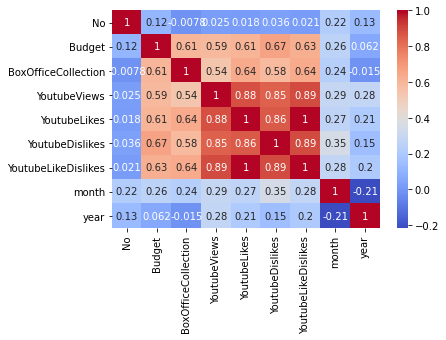

In [152]:
sns.heatmap(b1b2.corr(),cmap='coolwarm',annot=True)

In [153]:
corr_matrix = b1b2.corr()

In [154]:
corr_matrix['BoxOfficeCollection'].sort_values(ascending=False)

BoxOfficeCollection    1.000000
YoutubeLikeDislikes    0.644076
YoutubeLikes           0.641249
Budget                 0.605479
YoutubeDislikes        0.584029
YoutubeViews           0.542152
month                  0.235098
No                    -0.007807
year                  -0.015156
Name: BoxOfficeCollection, dtype: float64

# As we can see the correlation coefficient between BoxOfficeCollection and Budget = 0.605 hence the collection at box office tends to go up when value of Budget go up

In [157]:
# Q8. Which are the top 10 movies with maximum return of investment (ROI)? Calculate ROI as (Box office collection – Budget) / Budget. [1]

b1b2['ROI'] = (b1b2['BoxOfficeCollection'] - b1b2['Budget'])/b1b2['Budget']

In [160]:
b1b2.sort_values(by='ROI',ascending = False).head(10)

,No,RelDate,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes,YoutubeLikeDislikes,month,year,ROI
3,4,2013-01-04,Rajdhani Express,Normal,Drama,7.0,383.0,42626,86.0,19.0,105,1,2013,53.714286
14,65,2013-04-26,Aashiqui 2,Normal,Romance,12.0,110.0,2926673,4944.0,628.0,5572,4,2013,8.166667
39,90,2014-12-19,PK,Holiday Season,Drama,85.0,735.0,13270623,43767.0,5693.0,49460,12,2014,7.647059
82,133,2013-09-13,Grand Masti,Long Weekend,Comedy,35.0,298.0,1795640,3015.0,721.0,3736,9,2013,7.514286
85,136,2013-09-20,The Lunchbox,Normal,Drama,10.0,85.0,1064854,4054.0,285.0,4339,9,2013,7.500000
37,88,2013-06-14,Fukrey,Normal,Comedy,5.0,36.2,227912,222.0,39.0,261,6,2013,6.240000
8,59,2014-09-05,Mary Kom,Normal,Drama,15.0,104.0,6086811,26560.0,1647.0,28207,9,2014,5.933333
78,129,2013-10-18,Shahid,Festive Season,Drama,6.0,40.0,1148516,3155.0,396.0,3551,10,2013,5.666667
37,38,2014-07-11,Humpty Sharma Ki Dulhania,Normal,Romance,20.0,130.0,6604595,14535.0,2208.0,16743,7,2014,5.500000
51,102,2013-07-12,Bhaag Milkha Bhaag,Normal,Drama,30.0,164.0,2635390,4622.0,456.0,5078,7,2013,4.466667


# Above list shows the Top 10 movies with maximum Return of Investment